# Create a baseline model

In [1]:
import pandas as pd

from data import load_data_selected_features

train_data, additional_train_data, test_data = load_data_selected_features()

In [2]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150996 entries, p01_0 to p12_25298
Columns: 507 entries, p_num to bg+1:00
dtypes: float64(433), object(74)
memory usage: 585.2+ MB


In [3]:
additional_train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 168588 entries, p01_test_12 to p24_test_94938
Columns: 507 entries, p_num to bg+1:00
dtypes: float64(433), object(74)
memory usage: 657.4+ MB


In [4]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3644 entries, p01_8459 to p24_260
Columns: 506 entries, p_num to activity-0:00
dtypes: float64(432), object(74)
memory usage: 14.2+ MB


# Prepare the data

In [5]:
from pipelines_selected_features import pipeline

all_train_data = pd.concat([train_data, additional_train_data], axis=0)
all_train_data_transformed = pipeline.fit_transform(all_train_data)

train_data_transformed = all_train_data_transformed[:len(train_data)]
additional_train_data_transformed = all_train_data_transformed[len(train_data):]

X_train = train_data_transformed.drop(columns=['bg+1:00'])
y_train = train_data_transformed['bg+1:00']

X_additional_train = additional_train_data_transformed.drop(columns=['bg+1:00'])
y_additional_train = additional_train_data_transformed['bg+1:00']

## Predict for validation data and check results

In [6]:
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import StackingRegressor, HistGradientBoostingRegressor
from sklearn.linear_model import LassoLarsIC, Ridge

hgb_base_model = HistGradientBoostingRegressor(max_iter=200, max_depth=5, learning_rate=0.1)
lasso_lars_ic_base_model = LassoLarsIC(criterion='bic', max_iter=10000)
knn_base_model = KNeighborsRegressor(n_neighbors=5)
xgb_base_model = XGBRegressor(objective='reg:squarederror', random_state=42, n_estimators=500, max_depth=5, learning_rate=0.1)

estimators = [
    ('hgb', hgb_base_model),
    ('lasso_lars_ic', lasso_lars_ic_base_model),
    ('knn', knn_base_model),
    ('xgb', xgb_base_model),
]

baseline_model = StackingRegressor(
    estimators=estimators, 
    final_estimator=Ridge(alpha=0.1), n_jobs=-1, verbose=2)

13:43:45 - 13:43:45 - Start training
13:43:45 - 13:43:45 - Calculate performance for hgb
13:43:45 - 13:43:45 - Splitting the additional train data with ShuffleSplit
13:43:45 - 13:43:45 - Split 1 - Model: hgb
13:43:45 - 13:43:45 - Fitting the model
13:43:58 - 13:43:58 - Predicting
13:43:58 - 13:43:58 - Calculating scores
13:43:58 - 13:43:58 - R^2: 0.6178909558986059, RMSE: 2.0260555927583486, MAE: 1.5078447945976752, MSE: 4.104901264947383
13:43:58 - 13:43:58 - Split 2 - Model: hgb
13:43:58 - 13:43:58 - Fitting the model
13:44:10 - 13:44:10 - Predicting
13:44:10 - 13:44:10 - Calculating scores
13:44:10 - 13:44:10 - R^2: 0.6130605075862727, RMSE: 2.042100419252268, MAE: 1.5206490129277512, MSE: 4.170174122310289
13:44:10 - 13:44:10 - Split 3 - Model: hgb
13:44:10 - 13:44:10 - Fitting the model
13:44:23 - 13:44:23 - Predicting
13:44:23 - 13:44:23 - Calculating scores
13:44:23 - 13:44:23 - R^2: 0.6166632921357948, RMSE: 2.0120086573175224, MAE: 1.5040083969985818, MSE: 4.04817883712066
13:

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   17.0s remaining:   25.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   17.3s finished
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   54.2s remaining:  1.4min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   55.0s finished
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   55.4s remaining:  1.4min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   55.8s finished
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.5min remaining:  2.3min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.5min finished


13:52:58 - 13:52:58 - Predicting
13:53:07 - 13:53:07 - Calculating scores
13:53:17 - 13:53:17 - R^2: 0.6645378806889741, RMSE: 1.8983637942379148, MAE: 1.3933424171637472, MSE: 3.603785095273372
13:53:17 - 13:53:17 - Split 2 - Model: stacking_regressor
13:53:17 - 13:53:17 - Fitting the model


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   16.1s remaining:   24.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   16.4s finished
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   55.1s remaining:  1.4min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   55.8s finished
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   56.2s remaining:  1.4min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   56.5s finished
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.5min remaining:  2.3min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.5min finished


13:55:11 - 13:55:11 - Predicting
13:55:21 - 13:55:21 - Calculating scores
13:55:30 - 13:55:30 - R^2: 0.6595206743770159, RMSE: 1.9155828434920399, MAE: 1.4101343162058955, MSE: 3.6694576302810487
13:55:30 - 13:55:30 - Split 3 - Model: stacking_regressor
13:55:30 - 13:55:30 - Fitting the model


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   18.5s remaining:   27.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   18.7s finished
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   56.0s remaining:  1.4min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   56.7s finished
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   56.1s remaining:  1.4min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   56.6s finished
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.5min remaining:  2.3min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.6min finished


13:57:26 - 13:57:26 - Predicting
13:57:35 - 13:57:35 - Calculating scores
13:57:45 - 13:57:45 - R^2: 0.6617909562623467, RMSE: 1.8898713833810963, MAE: 1.3900074893678949, MSE: 3.5716138457227786
13:57:45 - 13:57:45 - Split 4 - Model: stacking_regressor
13:57:45 - 13:57:45 - Fitting the model


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   24.5s remaining:   36.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   24.8s finished
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.0min remaining:  1.5min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.0min finished
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.1min remaining:  1.6min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.7min remaining:  2.5min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.7min finished


13:59:48 - 13:59:48 - Predicting
13:59:58 - 13:59:58 - Calculating scores
14:00:09 - 14:00:09 - R^2: 0.6602609665758186, RMSE: 1.916232516523553, MAE: 1.410938192561965, MSE: 3.6719470573821886
14:00:09 - 14:00:09 - Split 5 - Model: stacking_regressor
14:00:09 - 14:00:09 - Fitting the model


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   22.0s remaining:   33.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   22.4s finished
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.0min remaining:  1.5min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.0min finished
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.0min remaining:  1.5min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.0min finished
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.7min remaining:  2.6min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.7min finished


14:02:14 - 14:02:14 - Predicting
14:02:25 - 14:02:25 - Calculating scores
14:02:35 - 14:02:35 - R^2: 0.6565264363899841, RMSE: 1.9023376975178024, MAE: 1.4011948750091334, MSE: 3.618888715397334
14:02:35 - 14:02:35 - Split 6 - Model: stacking_regressor
14:02:35 - 14:02:35 - Fitting the model


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   26.2s remaining:   39.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   26.4s finished
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.0min remaining:  1.5min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.0min finished
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.1min remaining:  1.6min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.7min remaining:  2.5min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.7min finished


14:04:41 - 14:04:41 - Predicting
14:04:51 - 14:04:51 - Calculating scores
14:05:01 - 14:05:01 - R^2: 0.6577763561230673, RMSE: 1.9052434192672743, MAE: 1.39943053477269, MSE: 3.6299524866612543
14:05:01 - 14:05:01 - Split 7 - Model: stacking_regressor
14:05:01 - 14:05:01 - Fitting the model


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   17.8s remaining:   26.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   23.0s finished
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.0min remaining:  1.6min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.1min remaining:  1.6min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.6min remaining:  2.4min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.6min finished


14:07:02 - 14:07:02 - Predicting
14:07:12 - 14:07:12 - Calculating scores
14:07:22 - 14:07:22 - R^2: 0.663921767799333, RMSE: 1.8937799137731408, MAE: 1.3884588049279434, MSE: 3.5864023618106047
14:07:22 - 14:07:22 - Split 8 - Model: stacking_regressor
14:07:22 - 14:07:22 - Fitting the model


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   20.8s remaining:   31.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   21.2s finished
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   57.1s remaining:  1.4min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   58.1s finished
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.1min remaining:  1.6min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.6min remaining:  2.4min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.6min finished


14:09:24 - 14:09:24 - Predicting
14:09:34 - 14:09:34 - Calculating scores
14:09:44 - 14:09:44 - R^2: 0.6594256033963363, RMSE: 1.8942990244718294, MAE: 1.3982288022677274, MSE: 3.588368794114925
14:09:44 - 14:09:44 - Split 9 - Model: stacking_regressor
14:09:44 - 14:09:44 - Fitting the model


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   22.3s remaining:   33.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   22.6s finished
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.0min remaining:  1.5min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.0min finished
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.1min remaining:  1.6min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.6min remaining:  2.4min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.6min finished


14:11:44 - 14:11:44 - Predicting
14:11:55 - 14:11:55 - Calculating scores
14:12:05 - 14:12:05 - R^2: 0.658240810585074, RMSE: 1.9085718576673532, MAE: 1.408467846716438, MSE: 3.6426465358798112
14:12:05 - 14:12:05 - Split 10 - Model: stacking_regressor
14:12:05 - 14:12:05 - Fitting the model


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   26.8s remaining:   40.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   27.2s finished
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.1min remaining:  1.6min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.1min remaining:  1.7min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.7min remaining:  2.6min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.8min finished


14:14:11 - 14:14:11 - Predicting
14:14:22 - 14:14:22 - Calculating scores
14:14:31 - 14:14:31 - R^2: 0.6584274835941513, RMSE: 1.912308640261075, MAE: 1.4096435569036643, MSE: 3.6569243356171617
14:14:31 - 14:14:31 - Training finished


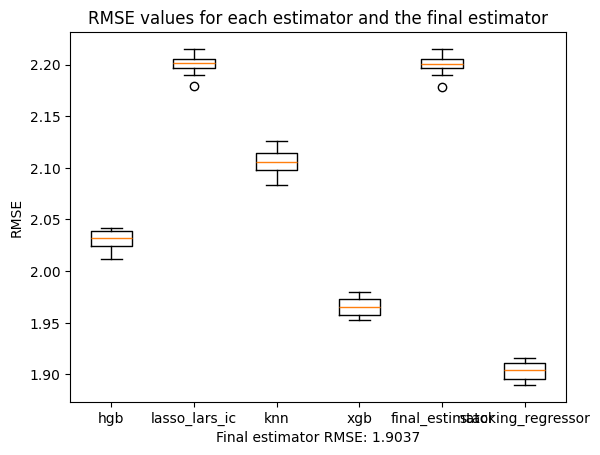

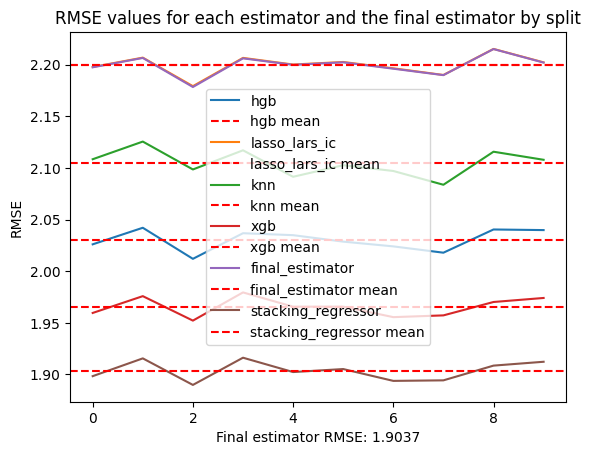

In [7]:
from datetime import datetime
import os
from model_performance_calculations import calculate_stacking_regressor_performance, get_rmse_boxplot_chart, get_rmse_line_chart, save_performances, save_model

date_time = datetime.now().strftime('%Y-%m-%d_%H-%M-%S')
model_name = f'{date_time}-baseline-model'

save_model(baseline_model, os.path.join('models', f'{model_name}.pkl'))

performances = calculate_stacking_regressor_performance(baseline_model, X_train, y_train, X_additional_train, y_additional_train)
save_performances(performances, os.path.join('models', f'{model_name}-performances.json'))

get_rmse_boxplot_chart(performances).show()
get_rmse_line_chart(performances).show()

In [ ]:
import numpy as np
from pipelines import pipeline

all_train_data = pipeline.fit_transform(pd.concat([train_data, additional_train_data], axis=0))
all_train_data_transformed = pipeline.fit_transform(all_train_data)
test_data_transformed = pipeline.transform(test_data)

X_train = all_train_data_transformed.drop(columns=['bg+1:00'])
y_train = all_train_data_transformed['bg+1:00']
X_test = test_data_transformed.drop(columns=['bg+1:00'])

baseline_model.fit(X_train, y_train)

In [ ]:
y_pred = baseline_model.predict(X_test)
test_data['bg+1:00'] = y_pred

if np.sum(y_pred < 0) > 0:
    print(f'Number of negative values: {np.sum(y_pred < 0)}')
    bg_min_train = np.min(y_train)
    print(f'Min value: {np.min(y_pred)}')
    y_pred = y_pred.apply(lambda x: bg_min_train if x < 0 else x)

test_data['bg+1:00'] = y_pred
test_data.head()

In [ ]:
submission = pd.DataFrame(test_data['bg+1:00'])
submission

In [ ]:
submission.to_csv(f'submission-{os.path.basename(os.getcwd())}.csv')